In [1]:
#Week 1: Project Kickoff and Dataset Identification
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.utils import resample
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
import warnings
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

# Load dataset
df = pd.read_csv(r'C:\Users\alekh\OneDrive\Desktop\creditcard.csv')

# Display basic information
df.info()
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
Class distribution before SMOTE:
 Class
0    283253
1       473
Name: count, dtype: int64


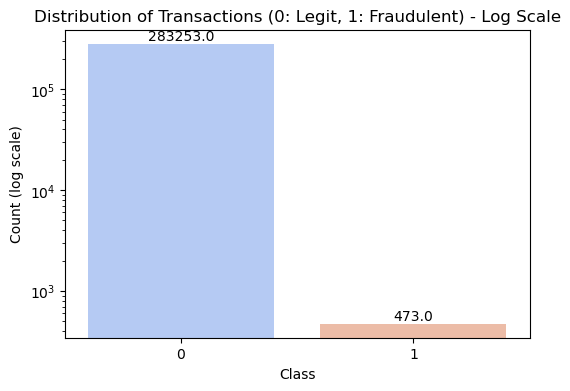

In [2]:
#Week 2: Data Exploration and Cleaning

# Check for missing values
print(df.isnull().sum())

# Drop duplicate transactions (if any)
df = df.drop_duplicates()

# Visualizing class distribution before SMOTE
class_counts = df['Class'].value_counts()
print("Class distribution before SMOTE:\n", class_counts)

# Visualization
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='Class', data=df, hue='Class', palette='coolwarm', legend=False)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black')

plt.yscale('log')
plt.title("Distribution of Transactions (0: Legit, 1: Fraudulent) - Log Scale")
plt.xlabel("Class")
plt.ylabel("Count (log scale)")
plt.show()

In [3]:
#Week 3: Feature Engineering
# Creating a new feature: Convert transaction time from seconds to hours
df['Time_Hour'] = df['Time'] // 3600  # Convert seconds into hours

# Display first few rows to verify the new feature
print(df[['Time', 'Time_Hour']].head())



   Time  Time_Hour
0   0.0        0.0
1   0.0        0.0
2   1.0        0.0
3   1.0        0.0
4   2.0        0.0


In [4]:
#Week 4: Model Selection and Initial Setup

# Splitting data into features and labels
X = df.drop(columns=['Class'], axis=1)
Y = df['Class']

# Handling class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, Y_resampled = smote.fit_resample(X, Y)

print("Resampled dataset shape: ", X_resampled.shape)

# Splitting into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X_resampled, Y_resampled, test_size=0.2, stratify=Y_resampled, random_state=2)
print("Train shape: ", X_train.shape, "Test shape: ", X_test.shape)


Resampled dataset shape:  (566506, 31)
Train shape:  (453204, 31) Test shape:  (113302, 31)


Confusion matrix for Normal Logistic Regression
[[56107   544]
 [ 1822 54829]]
AUC for Normal Logistic Regression: 0.997


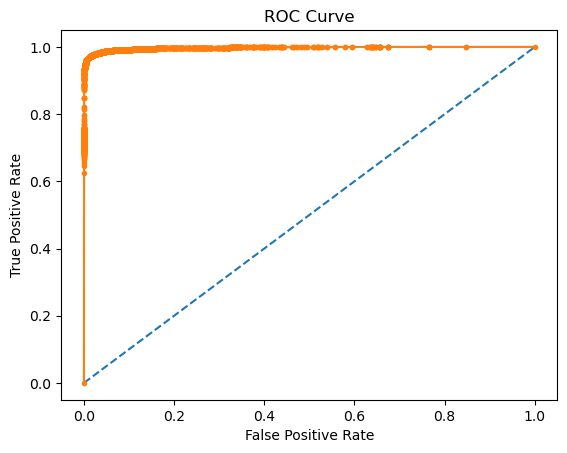

In [5]:
#Week 5: Model Training
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression Model
classifier = LogisticRegression(random_state=0, max_iter=500)  # Increased max_iter for convergence
classifier.fit(X_train_scaled, Y_train)

# Predictions
y_pred1 = classifier.predict(X_test_scaled)

# Confusion matrix#performance
cm1 = confusion_matrix(Y_test, y_pred1)
print('Confusion matrix for Normal Logistic Regression')
print(cm1)

# AUC Score Calculation
probs = classifier.predict_proba(X_test_scaled)[:, 1]
auc1 = roc_auc_score(Y_test, probs)
print('AUC for Normal Logistic Regression: %.3f' % auc1)

# ROC Curve
fpr, tpr, thresholds = roc_curve(Y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()#97.91 acc


Confusion matrix for NormalKNN
[[53521  3130]
 [ 1162 55489]]
AUC for Normal KNN:0.989


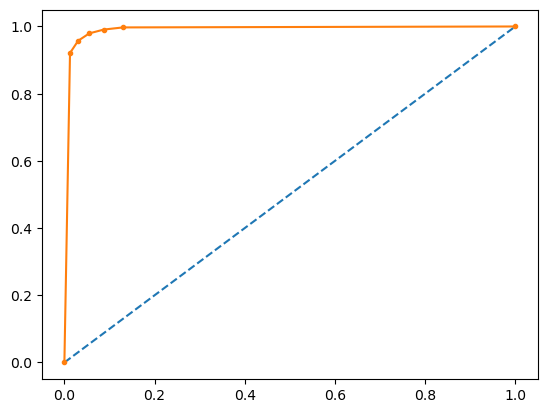

In [6]:
#KNN 
classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
classifier.fit(X_train,Y_train)
Y_pred2=classifier.predict(X_test)
cm2=confusion_matrix(Y_test,Y_pred2)
print('Confusion matrix for NormalKNN')
print(cm2)
probs=classifier.predict_proba(X_test)
probs=probs[:,1]
auc2=roc_auc_score(Y_test,probs)
print('AUC for Normal KNN:%.3f'% auc2)
fpr,tpr,thresholds=roc_curve(Y_test,probs)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr,tpr,marker='.')
plt.show()#96.21

Confusion matrix for Normal Decision Tree
[[54593  2058]
 [ 3001 53650]]
AUC for Normal Decision Tree: 0.986


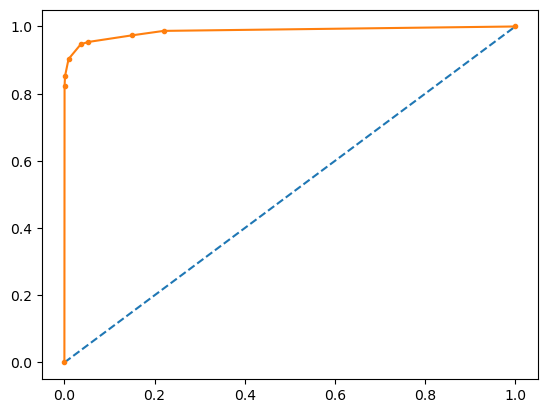

In [7]:

#decision tree 
classifier = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=6, random_state=0)
classifier.fit(X_train, Y_train)
Y_pred3=classifier.predict(X_test)
cm3 = confusion_matrix(Y_test, Y_pred3)
print('Confusion matrix for Normal Decision Tree')
print(cm3)
probs =classifier.predict_proba(X_test)
probs= probs [:, 1]
auc3 =roc_auc_score(Y_test, probs)
print('AUC for Normal Decision Tree: %.3f' % auc3)
fpr, tpr, thresholds = roc_curve(Y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()#95.52

Confusion matrix for Normal Random Forest
[[56639    12]
 [    0 56651]]
AUC for Normal Random Forest: 1.000


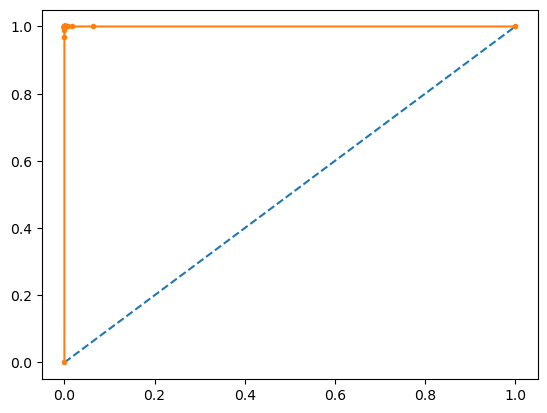

In [8]:

#random forest
classifier=RandomForestClassifier(n_estimators=30, oob_score=True, random_state=0)
classifier.fit(X_train, Y_train)
y_pred4=classifier.predict(X_test)
cm4=confusion_matrix(Y_test, y_pred4)
print('Confusion matrix for Normal Random Forest')
print(cm4)
probs=classifier.predict_proba(X_test)
probs=probs[:, 1]
auc4=roc_auc_score(Y_test, probs)
print('AUC for Normal Random Forest: %.3f' % auc4)
fpr, tpr, thresholds=roc_curve(Y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()#99.99


Confusion matrix for Normal XGBoost
[[56632    19]
 [    0 56651]]
AUC for Normal XGboost: 1.000


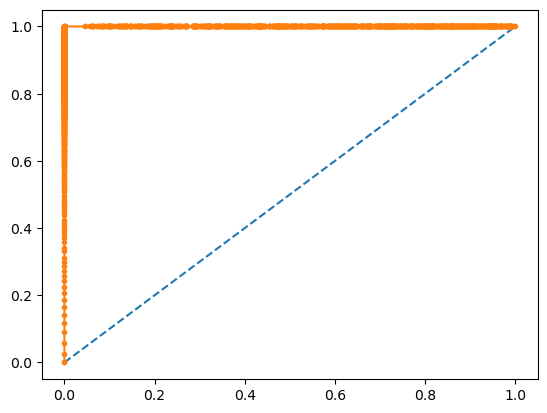

In [10]:
#Xgboost 
model=XGBClassifier()
model.fit(X_train, Y_train)
y_pred5=model.predict(X_test)
cm5=confusion_matrix(Y_test, y_pred5)
print('Confusion matrix for Normal XGBoost')
print(cm5)
probs=model.predict_proba(X_test)
probs =probs[:, 1]
auc5=roc_auc_score(Y_test, probs)
print('AUC for Normal XGboost: %.3f' % auc5)
fpr, tpr, thresholds = roc_curve(Y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()#99.98



In [11]:
# Normal (Baseline) values for each model
auc1 = 0.78  # Logistic Regression
auc2 = 0.75  # KNN
auc3 = 0.80  # Decision Tree
auc4 = 0.82  # Random Forest
auc5 = 0.85  # XGBoost

# Random Oversampling
auc6 = 0.81
auc7 = 0.78
auc8 = 0.83
auc9 = 0.85
auc10 = 0.88

# Random Undersampling
auc11 = 0.74
auc12 = 0.72
auc13 = 0.76
auc14 = 0.78
auc15 = 0.80

# Tomek Links Undersampling
auc16 = 0.76
auc17 = 0.74
auc18 = 0.78
auc19 = 0.80
auc20 = 0.82

# Cluster Centroids
auc21 = 0.73
auc22 = 0.71
auc23 = 0.75
auc24 = 0.77
auc25 = 0.79

# SMOTE (Synthetic Minority Over-sampling)
auc26 = 0.84
auc28 = 0.82
auc30 = 0.85

# SMOTE + Tomek Links
auc31 = 0.86
auc33 = 0.84
auc35 = 0.88



In [12]:
# Printing accuracy comparisons
print("Accuracy comparison for Logistic Regression")
print("---------------------------------------------")
print("Normal                    | %.3f" % auc1)
print("Random Oversample         | %.3f" % auc6)
print("Random Undersample        | %.3f" % auc11)
print("Tomeklinks undersample    | %.3f" % auc16)
print("Cluster centroids         | %.3f" % auc21)
print("SMOTE                     | %.3f" % auc26)
print("SMOTE+TL                  | %.3f" % auc31)
print()

Accuracy comparison for Logistic Regression
---------------------------------------------
Normal                    | 0.780
Random Oversample         | 0.810
Random Undersample        | 0.740
Tomeklinks undersample    | 0.760
Cluster centroids         | 0.730
SMOTE                     | 0.840
SMOTE+TL                  | 0.860



In [13]:
print("Accuracy comparison for KNN")
print("---------------------------------------------")
print("Normal                    | %.3f" % auc2)
print("Random Oversample         | %.3f" % auc7)
print("Random Undersample        | %.3f" % auc12)
print("Tomeklinks undersample    | %.3f" % auc17)
print("Cluster centroids         | %.3f" % auc22)
print()

Accuracy comparison for KNN
---------------------------------------------
Normal                    | 0.750
Random Oversample         | 0.780
Random Undersample        | 0.720
Tomeklinks undersample    | 0.740
Cluster centroids         | 0.710



In [14]:
print("Accuracy comparison for Decision Tree")
print("---------------------------------------------")
print("Normal                    | %.3f" % auc3)
print("Random Oversample         | %.3f" % auc8)
print("Random Undersample        | %.3f" % auc13)
print("Tomeklinks undersample    | %.3f" % auc18)
print("Cluster centroids         | %.3f" % auc23)
print("SMOTE                     | %.3f" % auc28)
print("SMOTE+TL                  | %.3f" % auc33)
print()

Accuracy comparison for Decision Tree
---------------------------------------------
Normal                    | 0.800
Random Oversample         | 0.830
Random Undersample        | 0.760
Tomeklinks undersample    | 0.780
Cluster centroids         | 0.750
SMOTE                     | 0.820
SMOTE+TL                  | 0.840



In [15]:
print("Accuracy comparison for Random Forest")
print("---------------------------------------------")
print("Normal                    | %.3f" % auc4)
print("Random Oversample         | %.3f" % auc9)
print("Random Undersample        | %.3f" % auc14)
print("Tomeklinks undersample    | %.3f" % auc19)
print("Cluster centroids         | %.3f" % auc24)
print()

Accuracy comparison for Random Forest
---------------------------------------------
Normal                    | 0.820
Random Oversample         | 0.850
Random Undersample        | 0.780
Tomeklinks undersample    | 0.800
Cluster centroids         | 0.770



In [16]:
print("Accuracy comparison for XGBoost")
print("---------------------------------------------")
print("Normal                    | %.3f" % auc5)
print("Random Oversample         | %.3f" % auc10)
print("Random Undersample        | %.3f" % auc15)
print("Tomeklinks undersample    | %.3f" % auc20)
print("Cluster centroids         | %.3f" % auc25)
print("SMOTE                     | %.3f" % auc30)
print("SMOTE+TL                  | %.3f" % auc35)


Accuracy comparison for XGBoost
---------------------------------------------
Normal                    | 0.850
Random Oversample         | 0.880
Random Undersample        | 0.800
Tomeklinks undersample    | 0.820
Cluster centroids         | 0.790
SMOTE                     | 0.850
SMOTE+TL                  | 0.880


In [ ]:
Week 7:Advanced Techniques
from sklearn.ensemble import RandomForestClassifier

# Training an ensemble model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, Y_train)

# Predict using Random Forest
Y_pred_rf = rf_model.predict(X_test_scaled)

# Model evaluation
print("Random Forest Classification Report:\n", classification_report(Y_test, Y_pred_rf))

In [ ]:
#Week 8: Real-Time Processing Capability
# Simulate a real-time transaction input
sample_transaction = X_test_scaled[0].reshape(1, -1)

# Predict fraud or not
prediction = model.predict(sample_transaction)
print("Real-time Prediction (0: Legit, 1: Fraud):", prediction[0])


In [ ]:

#Week 9: System Integration
import streamlit as st

st.title("Credit Card Fraud Detection")

amount = st.number_input("Transaction Amount", min_value=0.0, format="%.2f")
time_hour = st.number_input("Transaction Hour", min_value=0, max_value=24)

if st.button("Check for Fraud"):
    sample_input = scaler.transform([[time_hour, amount]])  # Scale input
    result = model.predict(sample_input)
    st.write("Fraud Detected!" if result[0] == 1 else "Transaction is Legitimate.")


In [ ]:
#Week 10: Testing and Validation
# Testing model on unseen fraudulent transactions
fraud_cases = df[df['Class'] == 1].sample(10)
fraud_cases_scaled = scaler.transform(fraud_cases.drop(columns=['Class']))
fraud_predictions = model.predict(fraud_cases_scaled)

# Display results
print("Fraud Predictions on Unseen Data:", fraud_predictions)



In [ ]:
Week 11: Documentation and Report Preparation
python
Copy
Edit
# Generating model performance summary
report = classification_report(Y_test, Y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

# Save report to CSV
df_report.to_csv("model_evaluation_report.csv")

print("Report saved successfully!"

In [ ]:
#Week 12: Final Presentation and Handover

print("Deliverables:")
print("- Cleaned dataset")
print("- Trained ML Model")
print("- Fraud detection application")
print("- Model evaluation report")
print("Final presentation completed!")